In [2]:
# Importações básicas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split

In [3]:
# Carregar o conjunto de dados iris
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Verificar as dimensões
print(f"Formato dos dados: {X.shape}")
print(f"Formato dos rótulos: {y.shape}")

# Dividir em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42)

Formato dos dados: (150, 4)
Formato dos rótulos: (150,)


In [5]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Exemplo de escalonamento de features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Exemplo mais complexo com diferentes tipos de dados
# (normalmente usado quando temos features numéricas e categóricas)
numeric_features = [0, 1, 2, 3]  # índices das colunas numéricas
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)
    ])

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Pipeline simples com pré-processamento e modelo
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Treinar o pipeline
pipeline.fit(X_train, y_train)

# Fazer previsões
y_pred = pipeline.predict(X_test)

Acurácia: 1.0000
Relatório de classificação:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       1.00      1.00      1.00        11
   virginica       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38

Matriz de confusão:
[[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]


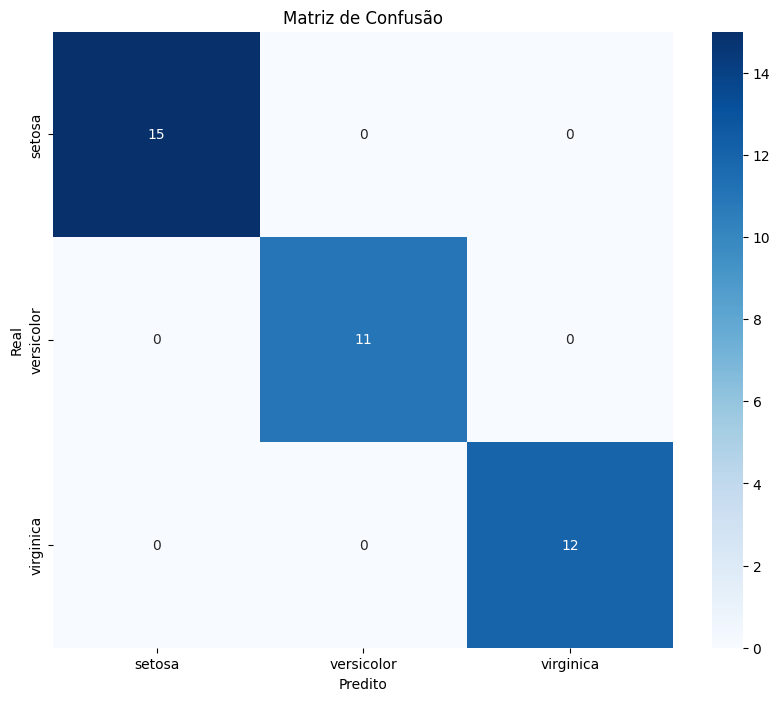

In [8]:
# Avaliar a precisão
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f"Acurácia: {accuracy:.4f}")

# Relatório de classificação
print("Relatório de classificação:")
print(metrics.classification_report(y_test, y_pred,
                                   target_names=iris.target_names))

# Matriz de confusão
cm = metrics.confusion_matrix(y_test, y_pred)
print("Matriz de confusão:")
print(cm)

# Visualizar a matriz de confusão
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
           xticklabels=iris.target_names,
           yticklabels=iris.target_names)
plt.xlabel('Predito')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()

In [9]:
from sklearn.model_selection import GridSearchCV

# Definir parâmetros para busca
param_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [None, 10, 20, 30]
}

# Criar objeto de busca em grade
grid_search = GridSearchCV(
    pipeline, param_grid, cv=5, scoring='accuracy'
)

# Executar busca
grid_search.fit(X_train, y_train)

# Melhores parâmetros
print("Melhores parâmetros:", grid_search.best_params_)
print("Melhor pontuação:", grid_search.best_score_)

# Usar o melhor modelo
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)
print(f"Acurácia com o melhor modelo: {metrics.accuracy_score(y_test, y_pred_best):.4f}")

Melhores parâmetros: {'classifier__max_depth': None, 'classifier__n_estimators': 200}
Melhor pontuação: 0.9462450592885375
Acurácia com o melhor modelo: 1.0000


In [10]:
import joblib

# Salvar o modelo
joblib.dump(best_model, 'modelo_iris.pkl')

# Carregar o modelo
modelo_carregado = joblib.load('modelo_iris.pkl')

# Verificar se o modelo carregado funciona
y_pred_loaded = modelo_carregado.predict(X_test)
print(f"Acurácia do modelo carregado: {metrics.accuracy_score(y_test, y_pred_loaded):.4f}")

Acurácia do modelo carregado: 1.0000


In [11]:
# Carregar o conjunto de dados de câncer de mama
cancer = datasets.load_breast_cancer()
X = cancer.data
y = cancer.target

# Dividir os dados
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Criar pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(max_iter=1000))
])

# Definir parâmetros para busca
param_grid = {
    'classifier__C': [0.01, 0.1, 1, 10, 100],
    'classifier__solver': ['liblinear', 'lbfgs']
}

# Busca em grade
grid_search = GridSearchCV(pipeline, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Melhor modelo
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Avaliação
print(f"Acurácia: {metrics.accuracy_score(y_test, y_pred):.4f}")
print("\nRelatório de classificação:")
print(metrics.classification_report(y_test, y_pred))

Acurácia: 0.9912

Relatório de classificação:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       0.99      1.00      0.99        71

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114

